<a href="https://colab.research.google.com/github/ShashankBDSC/Customer-segmentation/blob/main/customer_segmenation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Link to the dataset**  :
 https://drive.google.com/file/d/1nCwyLb5mTuouiigvi6sbNBT91W3MLUtF/view?usp=sharing

In [117]:
# importing libraries for analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [118]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')


In [119]:
df = pd.read_csv("/content/Online Retail.csv")
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


In [120]:
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/11 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/11 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/11 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/11 12:50,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,12/9/11 12:50,4.95,12680.0,France


In [121]:
df.shape

(541909, 8)

In [122]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [124]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [125]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [126]:
df.duplicated().sum()

5268

In [127]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [128]:
df['InvoiceNo']=df['InvoiceNo'].astype('str')
df[df['InvoiceNo'].str.startswith('C')]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,12/1/10 9:41,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/10 9:49,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/10 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/10 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/10 10:24,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,12/9/11 9:57,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,12/9/11 10:28,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,12/9/11 11:57,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,12/9/11 11:58,1.25,17315.0,United Kingdom


In [129]:
df=df[~df['InvoiceNo'].str.startswith('C')]
df.shape

(527390, 8)

In [130]:
df.dropna(inplace=True)
df.shape

(392732, 8)

In [131]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,392732.000000,392732.000000,392732.000000
mean,13.153718,3.125596,15287.734822
std,181.588420,22.240725,1713.567773
min,1.000000,0.000000,12346.000000
25%,2.000000,1.250000,13955.000000
50%,6.000000,1.950000,15150.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,8142.750000,18287.000000


In [132]:
df[df['UnitPrice']==0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
9302,537197,22841,ROUND CAKE TIN VINTAGE GREEN,1,12/5/10 14:02,0.0,12647.0,Germany
33576,539263,22580,ADVENT CALENDAR GINGHAM SACK,4,12/16/10 14:36,0.0,16560.0,United Kingdom
40089,539722,22423,REGENCY CAKESTAND 3 TIER,10,12/21/10 13:45,0.0,14911.0,EIRE
47068,540372,22090,PAPER BUNTING RETROSPOT,24,1/6/11 16:41,0.0,13081.0,United Kingdom
47070,540372,22553,PLASTERS IN TIN SKULLS,24,1/6/11 16:41,0.0,13081.0,United Kingdom
56674,541109,22168,ORGANISER WOOD ANTIQUE WHITE,1,1/13/11 15:10,0.0,15107.0,United Kingdom
86789,543599,84535B,FAIRY CAKES NOTEBOOK A6 SIZE,16,2/10/11 13:08,0.0,17560.0,United Kingdom
130188,547417,22062,CERAMIC BOWL WITH LOVE HEART DESIGN,36,3/23/11 10:25,0.0,13239.0,United Kingdom
139453,548318,22055,MINI CAKE STAND HANGING STRAWBERY,5,3/30/11 12:45,0.0,13113.0,United Kingdom
145208,548871,22162,HEART GARLAND RUSTIC PADDED,2,4/4/11 14:42,0.0,14410.0,United Kingdom


In [133]:
df=df[df['UnitPrice']>0]
df['UnitPrice'].describe()

count    392692.000000
mean          3.125914
std          22.241836
min           0.001000
25%           1.250000
50%           1.950000
75%           3.750000
max        8142.750000
Name: UnitPrice, dtype: float64

In [134]:
df.shape

(392692, 8)

##Feature engineering

In [135]:
df['InvoiceDate']=pd.to_datetime(df['InvoiceDate'])

In [136]:
df['year']=df['InvoiceDate'].dt.year
df['month']=df['InvoiceDate'].dt.month
df['month_name']=df['InvoiceDate'].dt.month_name()
df['day']=df['InvoiceDate'].dt.day
df['day_name']=df['InvoiceDate'].dt.day_name()
df['hour']=df['InvoiceDate'].dt.hour
df['minute']=df['InvoiceDate'].dt.minute
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,year,month,month_name,day,day_name,hour,minute
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,12,December,1,Wednesday,8,26
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,December,1,Wednesday,8,26
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,12,December,1,Wednesday,8,26
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,December,1,Wednesday,8,26
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,December,1,Wednesday,8,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,2011,12,December,9,Friday,12,50
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,2011,12,December,9,Friday,12,50
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,2011,12,December,9,Friday,12,50
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,2011,12,December,9,Friday,12,50


In [137]:
df['Totalamount']=df['Quantity']*df['UnitPrice']
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,year,month,month_name,day,day_name,hour,minute,Totalamount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,12,December,1,Wednesday,8,26,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,December,1,Wednesday,8,26,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,12,December,1,Wednesday,8,26,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,December,1,Wednesday,8,26,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,December,1,Wednesday,8,26,20.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,2011,12,December,9,Friday,12,50,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,2011,12,December,9,Friday,12,50,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,2011,12,December,9,Friday,12,50,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,2011,12,December,9,Friday,12,50,16.60


##**Exploratory Data Analysis:**


We will be discovering insights like:





1. Which products are the most and least sold ones?

2. Which countries has the most and least number of customers?

3. Distribution of the numerical features.

4. Which day had the most and least number of purchases?

5. Which month had the most and least number of purchases?

6. Which hour in a day had the most and least number of purchases?

###**Which products are the most and least sold ones?**

In [138]:
countdf=df['Description'].value_counts(sort=True).reset_index()


In [139]:
countdf.head()

,Description,count
0,WHITE HANGING HEART T-LIGHT HOLDER,2016
1,REGENCY CAKESTAND 3 TIER,1713
2,JUMBO BAG RED RETROSPOT,1615
3,ASSORTED COLOUR BIRD ORNAMENT,1395
4,PARTY BUNTING,1389


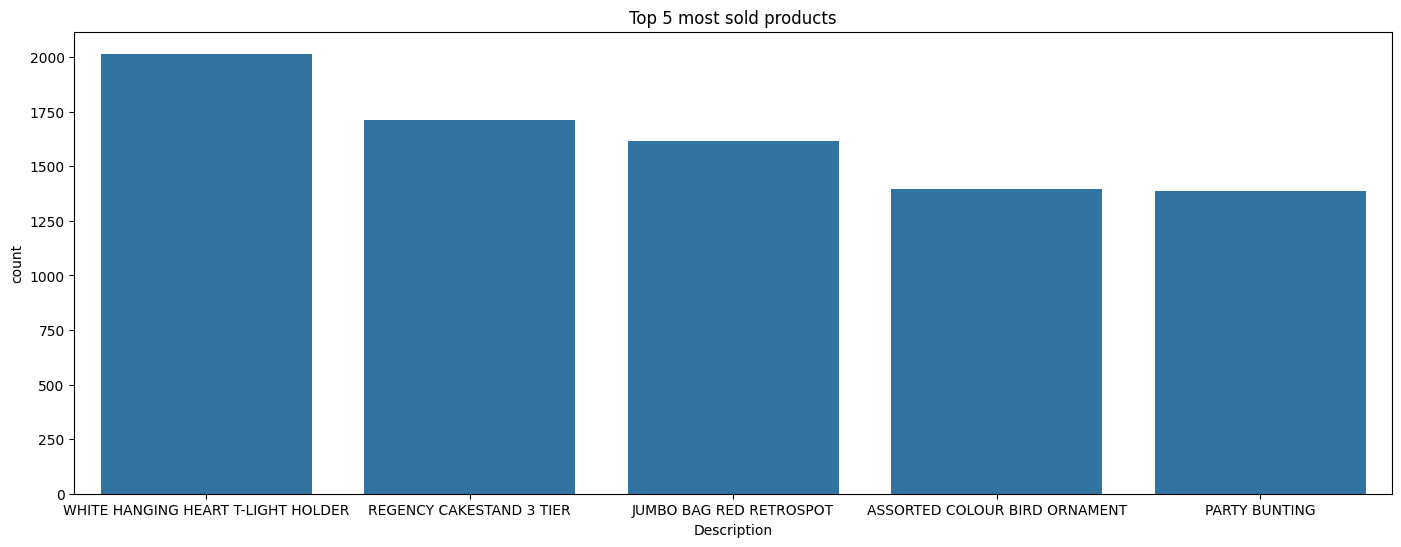

In [140]:
plt.figure(figsize=(17,6))
sns.barplot(data=countdf[0:5],x='Description',y='count')
plt.title('Top 5 most sold products')
plt.show()


In [141]:
countdf.tail()

,Description,count
3872,GREEN WITH METAL BAG CHARM,1
3873,WHITE WITH METAL BAG CHARM,1
3874,BLUE/NAT SHELL NECKLACE W PENDANT,1
3875,PINK EASTER HENS+FLOWER,1
3876,"PAPER CRAFT , LITTLE BIRDIE",1


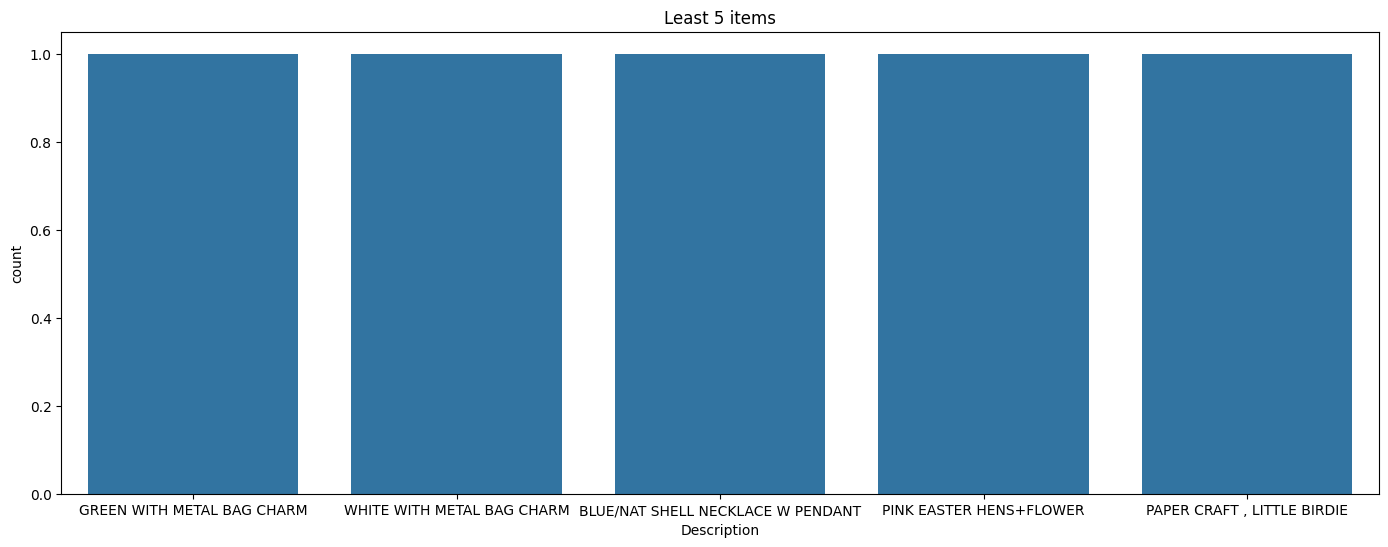

In [142]:
plt.figure(figsize=(17,6))
sns.barplot(data=countdf[-5:],x='Description',y='count')
plt.title('Least 5 items')
plt.show()

###**Which countries has the most and the least number of customers?**

In [143]:
country_df = df['Country'].value_counts().reset_index()
country_df.head()

,Country,count
0,United Kingdom,349203
1,Germany,9025
2,France,8326
3,EIRE,7226
4,Spain,2479


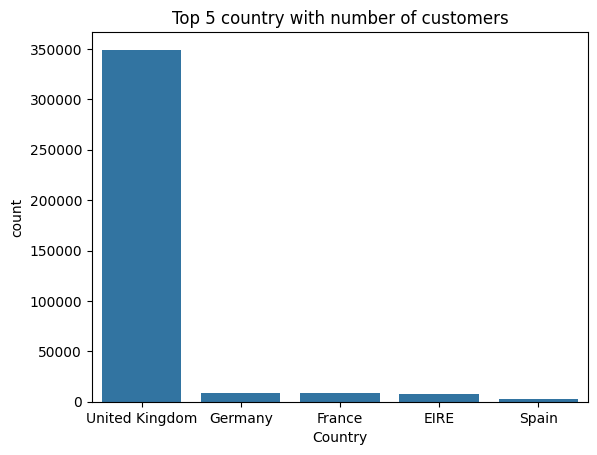

In [144]:
sns.barplot(x='Country', y='count', data=country_df[:5])
plt.title('Top 5 country with number of customers')
plt.show()

In [145]:
# bottom 5 countries based on the number of customers
country_df.tail()

,Country,count
32,Lithuania,35
33,Brazil,32
34,Czech Republic,25
35,Bahrain,17
36,Saudi Arabia,9


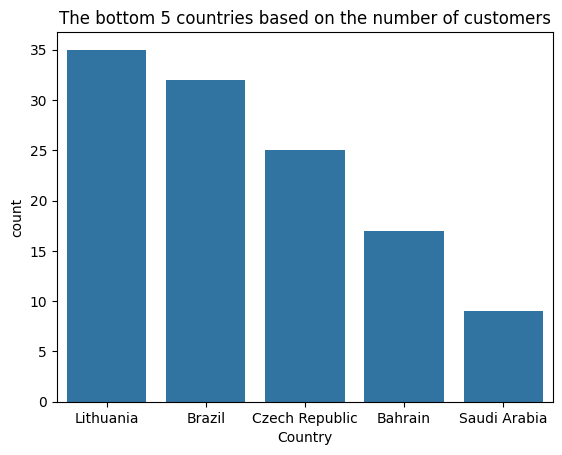

In [146]:
# plot the bottom 5 countries based on the number of customers
sns.barplot(x='Country', y='count', data=country_df[-5:])
plt.title('The bottom 5 countries based on the number of customers')
plt.show()

**How many unique customers are there?**

In [147]:
len(df['CustomerID'].unique())

4338

*   There are 4338 unique customers present in the whole transactional dataset.




**What is the order share of the top 10 customers?**

In [148]:
share_df =(df['CustomerID'].value_counts()/df.shape[0]*100).reset_index()
share_df.columns = ['Customer ID', 'Order Share']
share_df.cumsum()

,Customer ID,Order Share
0,17841.0,1.954713
1,32752.0,3.398592
2,46848.0,4.700121
3,59596.0,5.823648
4,74202.0,6.505353
...,...,...
4333,66312604.0,99.998981
4334,66325906.0,99.999236
4335,66339176.0,99.999491
4336,66355324.0,99.999745


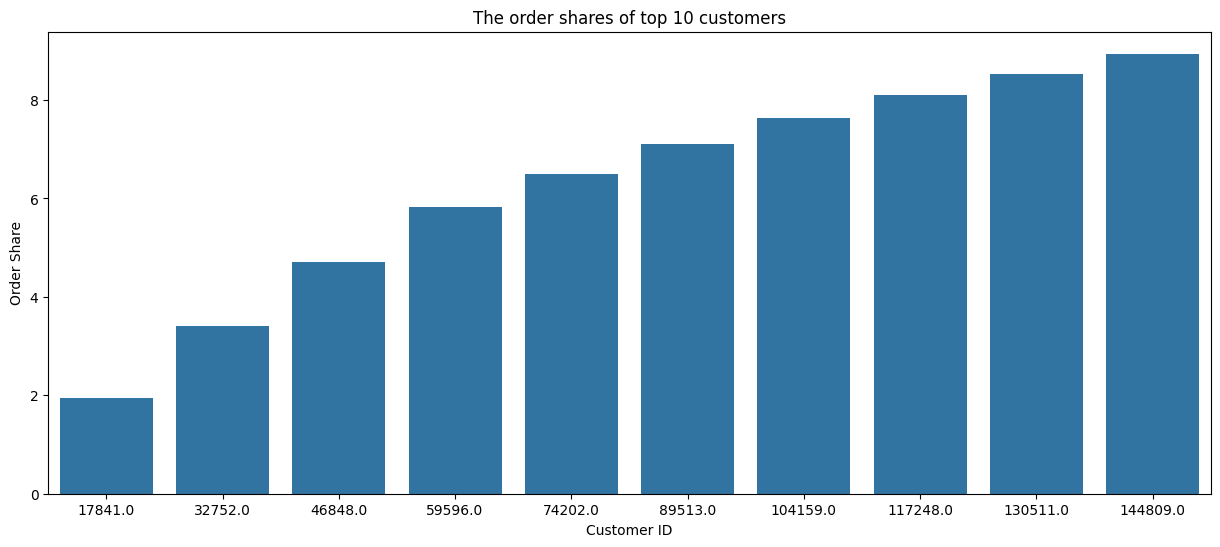

In [149]:
# plot the top 10 customer's order share
plt.figure(figsize=(15,6))
sns.barplot(x='Customer ID', y='Order Share', data=share_df[:10].cumsum())
plt.title('The order shares of top 10 customers')
plt.show()

* We can observe that only 10 customers out of 4338 unique customers are responsible for approx **9%** of the total orders.

* We can infer that these customers might be wholesalers.

###**The distribution of the numerical features :**

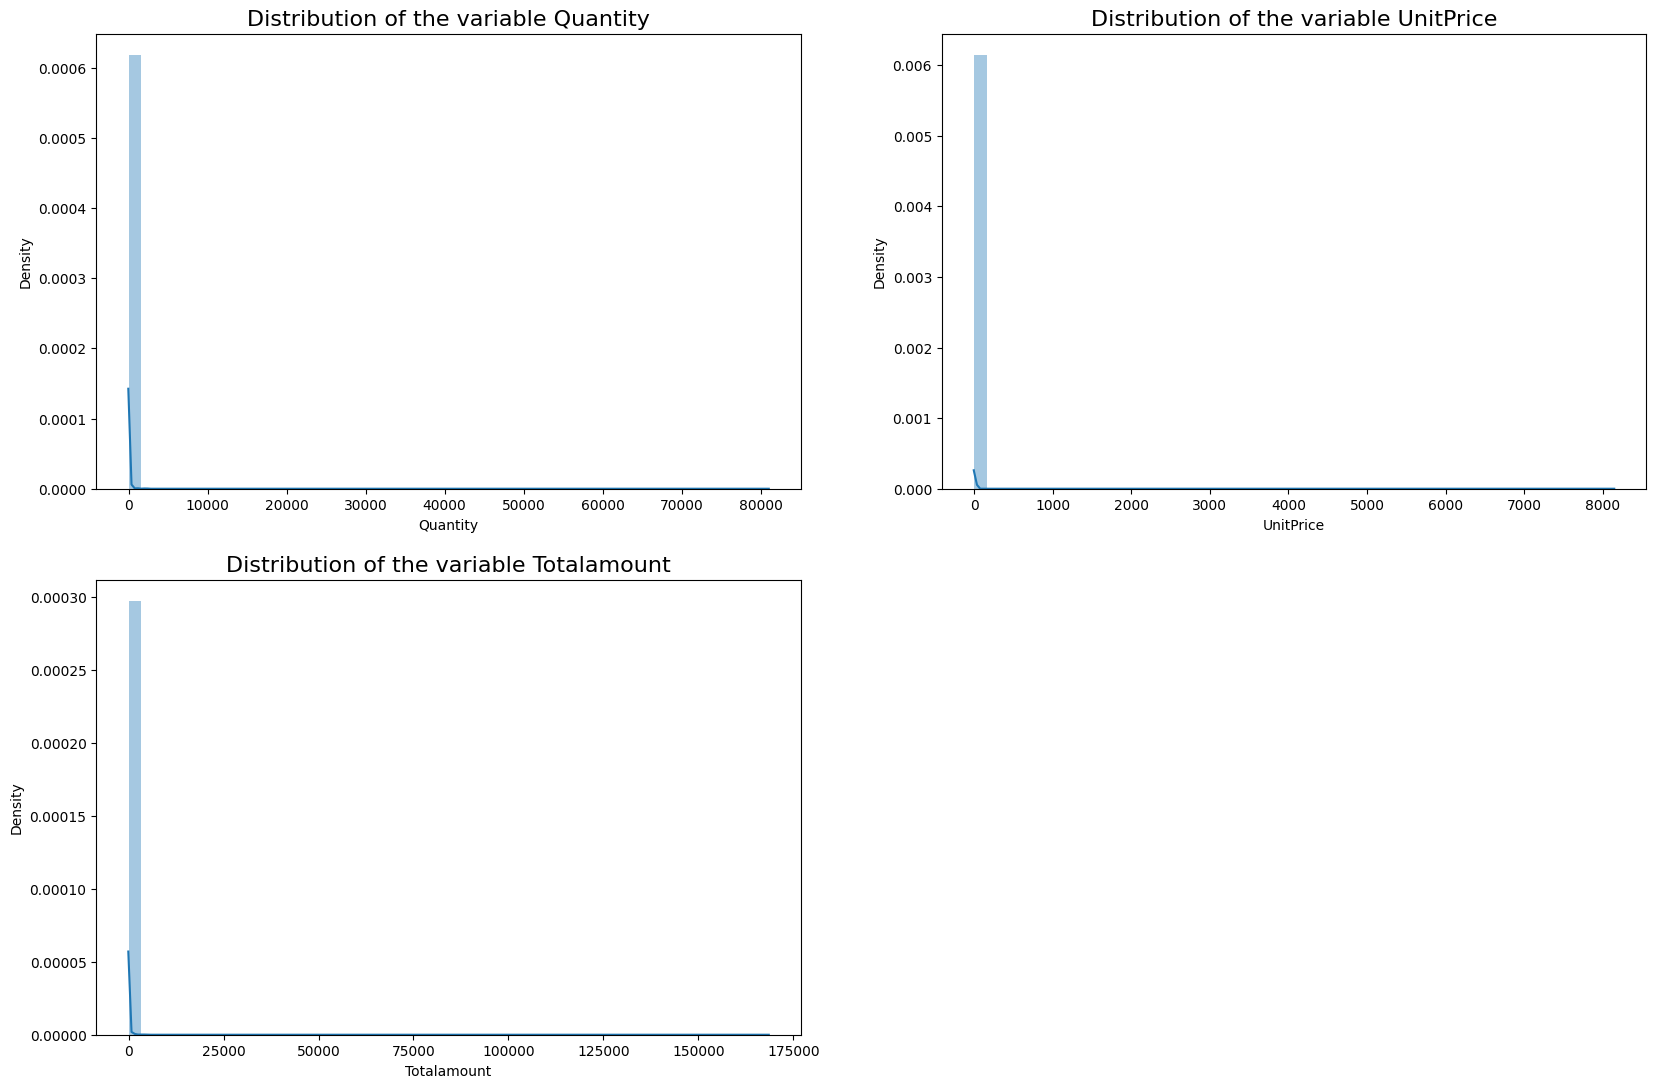

In [150]:
# plot the distribution of the numerical features
num_features = ['Quantity', 'UnitPrice', 'Totalamount']
count = 1
plt.subplots(figsize=(20,13))
for feature in num_features:
  plt.subplot(2,2,count)
  sns.distplot(df[feature])
  plt.title(f"Distribution of the variable {feature}", fontsize=16)
  plt.xlabel(f"{feature}")
  plt.ylabel("Density")
  count += 1



*   The distribution of all the variables are heavily right skewed.

* We will apply log transformation on these variables to make it less skewed.




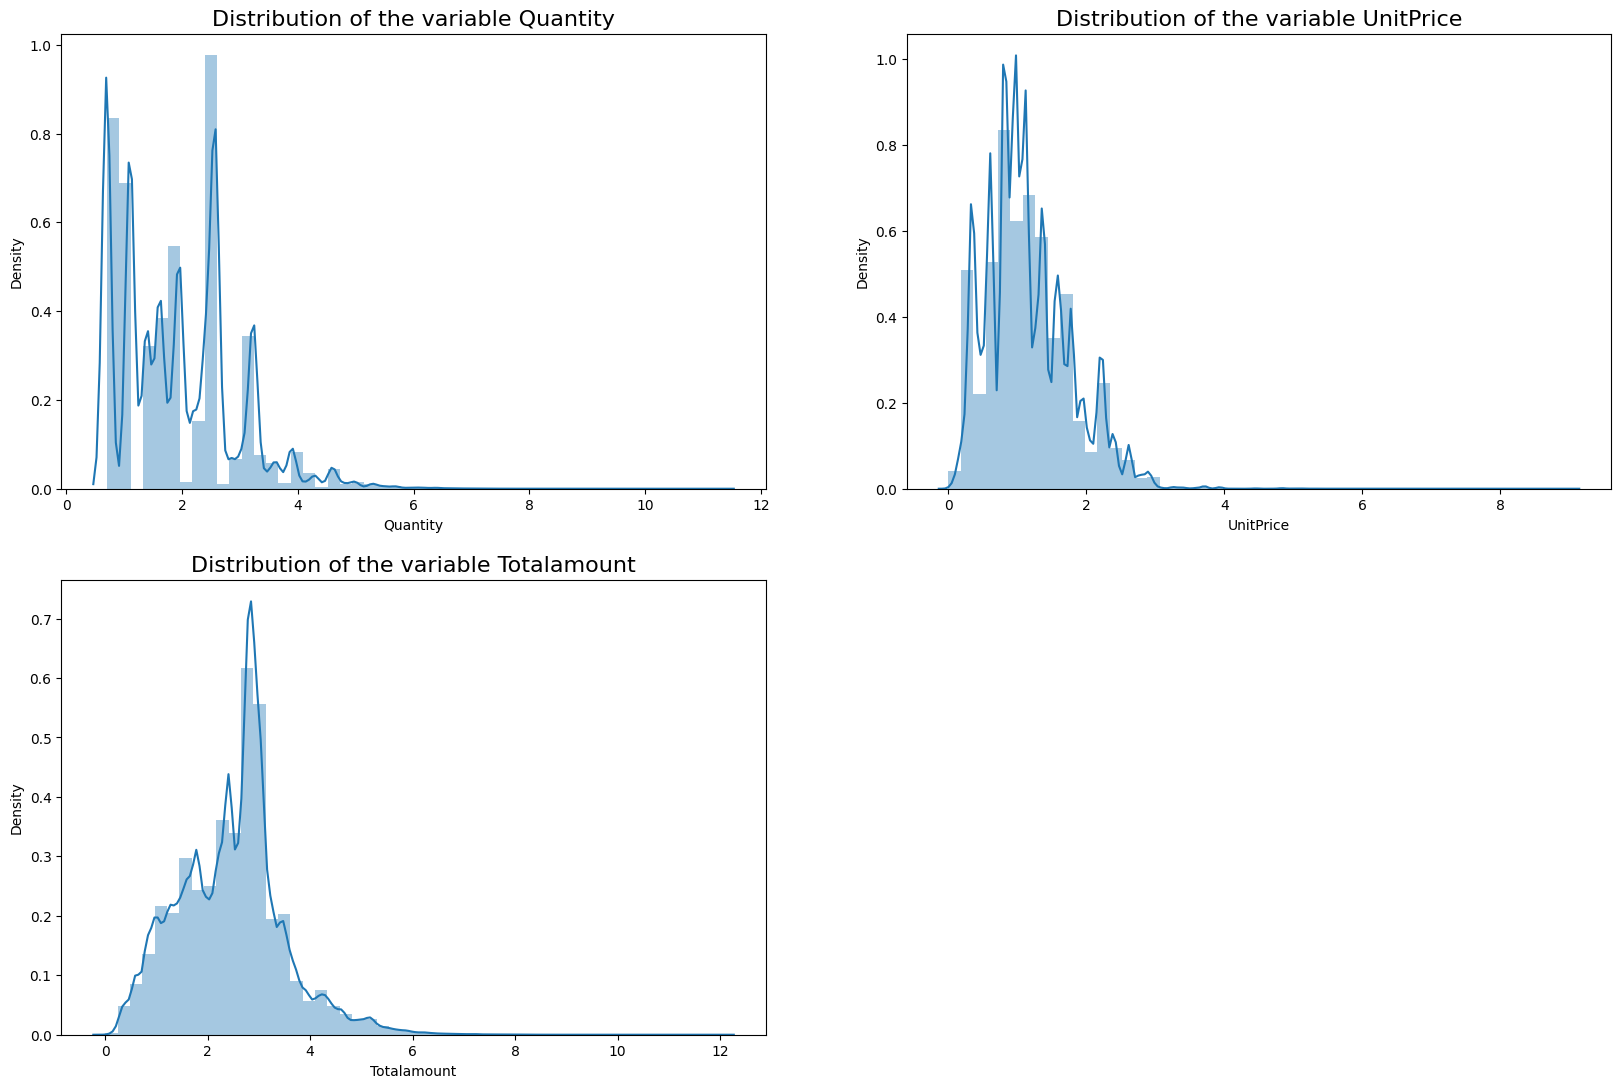

In [151]:
# taking a log transformation
count = 1
plt.subplots(figsize=(20,13))
for feature in num_features:
  plt.subplot(2,2,count)
  sns.distplot(np.log1p(df[feature]))
  plt.title(f"Distribution of the variable {feature}", fontsize=16)
  plt.xlabel(f"{feature}")
  plt.ylabel("Density")
  count += 1

* The variables after log transformation are less skewed than before.

* It isn't a normal distribution but somewhat close to that than before.

###**Which day of the week had the most and the least number of purchases?**

In [152]:
# number of purchases w.r.t the day of the week
day_df = df['day_name'].value_counts().reset_index()
day_df

,day_name,count
0,Thursday,79243
1,Wednesday,68040
2,Tuesday,65744
3,Monday,64231
4,Sunday,61212
5,Friday,54222


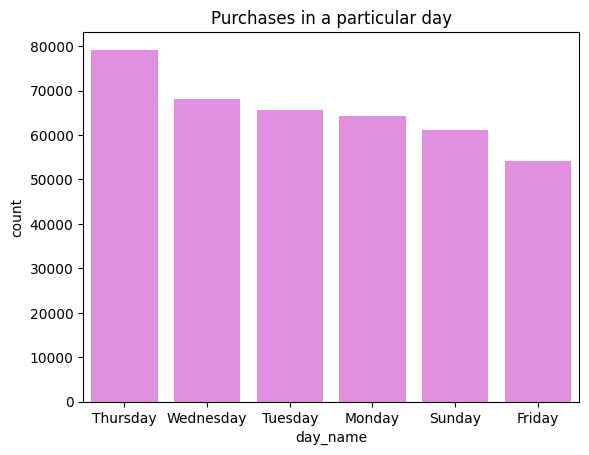

In [153]:
# plot the number of purchases w.r.t day of the week
sns.barplot(x='day_name', y='count', data=day_df,color='violet')
plt.title('Purchases in a particular day')
plt.show()

* Most of the customers have made a purchase in Thursday followed by Wednesday.

* Friday is the day with least number of purchases made.

###**Which month had the most and the least number of purchases?**

In [154]:
# number of purchases w.r.t month
month_df =df['month_name'].value_counts().reset_index()
month_df

,month_name,count
0,November,63168
1,October,48793
2,December,42696
3,September,39669
4,May,28073
5,June,26926
6,March,26870
7,August,26790
8,July,26580
9,April,22433


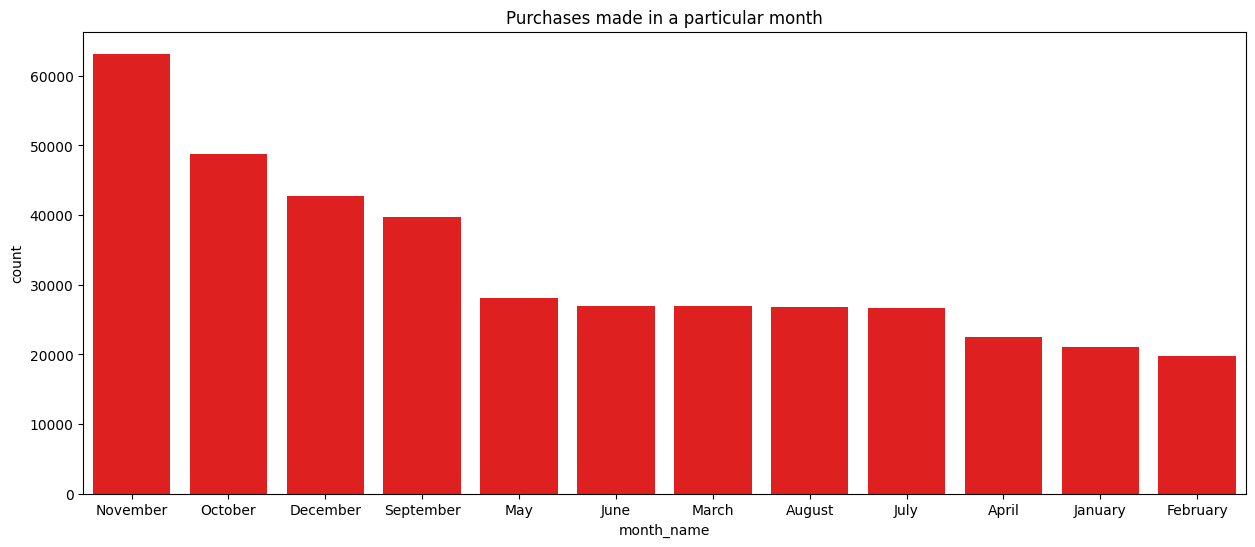

In [155]:
# plot the number of purchases w.r.t month
plt.figure(figsize=(15,6))
sns.barplot(x='month_name', y='count', data=month_df,color='red')
plt.title('Purchases made in a particular month')
plt.show()

* The most number of purchases are made during **October to December** which is a festive season for many people.

* The least number of purchases are made during the initial months of a year, **January and February** which is quite obvious because as soon as the festive season ends, purchases or sales will go down.

###**Which hour of the day had the most and the least number of purchases?**

In [156]:
# number of purchases w.r.t hour of the day
hour_df = df['hour'].value_counts().reset_index()
hour_df

,hour,count
0,12,70938
1,13,63019
2,14,53251
3,11,48365
4,15,44790
5,10,37773
6,16,23715
7,9,21927
8,17,12941
9,8,8687


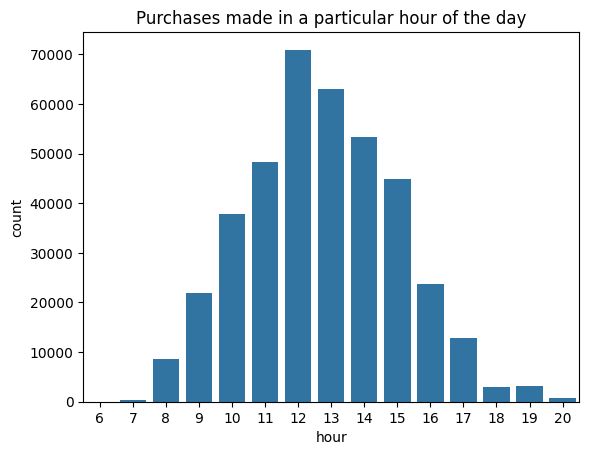

In [157]:
sns.barplot(x='hour',y='count',data=hour_df)
plt.title('Purchases made in a particular hour of the day')
plt.show()

* Most of the purchases are around the afternoon period and a very few number of purchases during morning or evening.

* We can bucket this hour graph into morning, afternoon and evening bucke

In [158]:
def day_time(time):
  if time >6 and time <=11:
    return 'morning'
  elif time >11 and time <17:
    return 'afternoon'
  else:
    return 'evening'

df['time_day']=df['hour'].apply(day_time)
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,year,month,month_name,day,day_name,hour,minute,Totalamount,time_day
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,12,December,1,Wednesday,8,26,15.30,morning
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,December,1,Wednesday,8,26,20.34,morning
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,12,December,1,Wednesday,8,26,22.00,morning
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,December,1,Wednesday,8,26,20.34,morning
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,December,1,Wednesday,8,26,20.34,morning
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,2011,12,December,9,Friday,12,50,10.20,afternoon
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,2011,12,December,9,Friday,12,50,12.60,afternoon
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,2011,12,December,9,Friday,12,50,16.60,afternoon
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,2011,12,December,9,Friday,12,50,16.60,afternoon


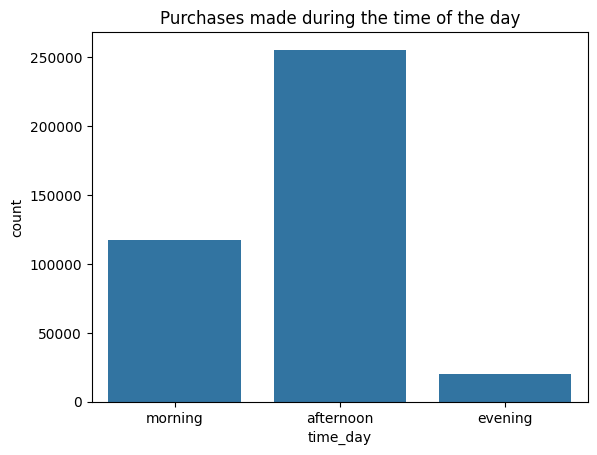

In [178]:
# plot the number of purchases w.r.t hour again
sns.countplot(x='time_day', data=df)
plt.title('Purchases made during the time of the day')
plt.show()

Now, it is more clear that **most of the purchases** has occurred during the **Afternoon** followed by Morning and the **least number of purchases during Evening.**